In [1]:
import pandas as pd 


In [3]:
df=pd.read_excel(r'C:\Users\mmioi\Downloads\Marketing.xlsx')

In [4]:
df.head()

,Observation,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
0,1,65.66,47.86,52.46,165.98,39.26,5,High
1,2,39.10,55.20,77.40,171.70,38.90,7,Medium
2,3,174.81,52.01,68.01,294.83,49.51,11,Medium
3,4,34.36,61.96,86.86,183.18,40.56,7,High
4,5,78.21,40.91,30.41,149.53,40.21,9,Low


In [6]:
df=df.set_index('Observation')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 1 to 172
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   google_adwords   172 non-null    float64
 1   facebook         172 non-null    float64
 2   twitter          172 non-null    float64
 3   marketing_total  172 non-null    float64
 4   revenues         172 non-null    float64
 5   employees        172 non-null    int64  
 6   pop_density      172 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


In [8]:
training=df[:120]

In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 1 to 120
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   google_adwords   120 non-null    float64
 1   facebook         120 non-null    float64
 2   twitter          120 non-null    float64
 3   marketing_total  120 non-null    float64
 4   revenues         120 non-null    float64
 5   employees        120 non-null    int64  
 6   pop_density      120 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 7.5+ KB


In [12]:
from sklearn.neighbors import KNeighborsClassifier as knn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
df.columns

Index(['google_adwords', 'facebook', 'twitter', 'marketing_total', 'revenues',
       'employees', 'pop_density'],
      dtype='object')

In [30]:
x=df.drop('pop_density',axis=1).values
y=df.pop_density.values
le=LabelEncoder()
Y=le.fit_transform(y)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,train_size=0.33,random_state=123,shuffle=True)

In [40]:
model=knn(5)
model.fit(x_train,y_train)
y_preds=model.predict(x_test)

In [57]:
print ("Training Score: ",model.score(x_train,y_train))

Training Score:  0.5357142857142857


In [59]:
print ('Test Score: ',model.score(x_test,y_test))

Test Score:  0.3793103448275862


In [55]:
from sklearn.model_selection import cross_val_score
import numpy as np
knn_cv = knn(n_neighbors=5) 
cv_scores = cross_val_score(knn_cv, x, Y, cv=5)
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))


[0.34285714 0.34285714 0.5        0.32352941 0.41176471]
cv_scores mean:0.3842016806722689


In [63]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Performace Under Varying K Values')

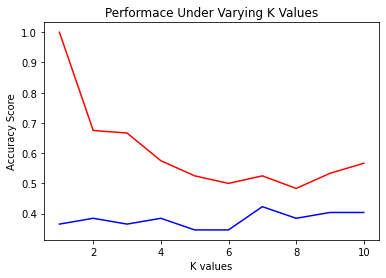

In [64]:
X_train,X_test, y_train, y_test= train_test_split(x,Y,random_state=42, test_size=.3)
# create a set of k values and an empty list for training and testing accuracy scores
k_values=[1,2,3,4,5,6,7,8,9,10]
train_scores=[]
test_scores=[]
# instantiate the model 
k_nn=knn()
# create a for loop of models with different k's 

for k in k_values: 
  k_nn.n_neighbors=k 
  k_nn.fit(X_train,y_train)
  train_score=k_nn.score(X_train,y_train)
  test_score=k_nn.score(X_test,y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.plot(k_values,train_scores, color='red',label='Training Accuracy')
plt.plot(k_values,test_scores, color='blue',label='Testing Accuracy')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Performace Under Varying K Values')    